<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0315/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from urllib.request import urlretrieve

url = "https://github.com/Elwing-Chou/tibaml0315/raw/main/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/tibaml0315/raw/main/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7f0204576070>)

In [ ]:
import pandas as pd
train = pd.read_csv("train.csv", encoding="utf-8")
test = pd.read_csv("test.csv", encoding="utf-8")

In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# 資料預處理: 1. 先把空值填完
total = pd.concat([train, test], axis=0)
total = total.drop(["PassengerId", "Survived"], axis=1)
total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
def cabin(c):
    if pd.isna(c):
        return c
    else:
        return c[0]
total["Cabin"] = total["Cabin"].apply(cabin)

In [ ]:
c = total["Ticket"].value_counts()
def ticket(t):
    if pd.isna(t):
        return t
    else:
        return c[t]
total["Ticket"] = total["Ticket"].apply(ticket)

In [ ]:
import re
# 平常
# n = "Braund, Mr. Owen Harris"
# n.split(".")[0].split(",")[-1]
def name(n):
    if pd.isna(n):
        return n
    else:
        pat = r".+,(.+?)\..+"  
        mid = re.match(pat, n).group(1)
        return mid.strip()
total["Name"] = total["Name"].apply(name)

pandas篩選: Series/DataFrame[跟妳資料一樣多的True/False]

In [ ]:
s = total.isna().sum()
s[s != 0].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

缺失值

1. 數值型(無限多種的): Age, Sibsp, Parch, Ticket, Fare

2. 類別型(固定數種的): Pclass, Name, Sex, Cabin, Embarked

補缺失值: 捕最可能的

1. 數值型: 中間值(中位數)

2. 類別型: 最常出現的

In [ ]:
med = total.median().drop("Pclass")
total = total.fillna(med)

<ipython-input-9-dc1a23f12b47>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med = total.median().drop("Pclass")


In [ ]:
most = total["Embarked"].value_counts().idxmax()
total["Embarked"] = total["Embarked"].fillna(most)

所有類別型的資料還要再做最後一個處理: One-Hot Encoding

Pclass可以不做: 他是有大小關係的類別, 但我實驗過作比較好

Sex可以不做: 二值

一定要做: 

a. 要確定資料處理好

b. 有時候太過稀少你可以為了表格的美觀而把它丟掉 

c. 可以順手用one-hot來補缺失職


In [ ]:
c = total["Name"].value_counts()
reserved = c[c > 10].index
def name2(n):
    if n in reserved:
        return n
    else:
        return None
total["Name"] = total["Name"].apply(name2)

In [ ]:
total = pd.get_dummies(total)
total = pd.get_dummies(total, columns=["Pclass"])
total

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
414,39.0,0,0,3,108.9000,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
415,38.5,0,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
416,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


1. 缺失 
2. One-Hot 
3. 萃取出更多欄位(回頭在做)

In [ ]:
total["Family"] = total["SibSp"] + total["Parch"]
total

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,...,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,...,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
414,39.0,0,0,3,108.9000,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
415,38.5,0,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
416,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
total_scale = scaler.fit_transform(total)
total_scale = pd.DataFrame(total_scale)
total_scale

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.273456,0.125,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
1,0.473882,0.125,0.000000,0.1,0.139136,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.1
2,0.323563,0.000,0.000000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.436302,0.125,0.000000,0.1,0.103644,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.1
4,0.436302,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1305,0.486409,0.000,0.000000,0.2,0.212559,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1306,0.480145,0.000,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1307,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
import numpy as np
x = np.array(total_scale.iloc[:len(train)])
y = np.array(train["Survived"])
x_predict = np.array(total_scale.iloc[len(train):])
print(x.shape)
print(y.shape)
print(x_predict.shape)

(891, 26)
(891,)
(418, 26)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
maxk, maxs = None, -1
for k in range(3, 20):
    clf = KNeighborsClassifier(n_neighbors=k)
    # 10分數
    scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)
    # print("!", scores)
    avg = np.average(scores)
    print(k, avg)
    if avg > maxs:
        maxk, maxs = k, avg
print("!!!!", maxk, maxs)

3 0.8204993757802747
4 0.8081148564294631
5 0.8170786516853932
6 0.8227091136079899
7 0.832796504369538
8 0.8136828963795256
9 0.8125842696629213
10 0.8058676654182271
11 0.818214731585518
12 0.8069787765293384
13 0.8137203495630463
14 0.8125842696629213
15 0.8227215980024967
16 0.8137203495630463
17 0.8193508114856429
18 0.8137203495630461
19 0.8137203495630463
!!!! 7 0.832796504369538


In [ ]:
# 如果要靠賽 11
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x, y)
pre = clf.predict(x_predict)
pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived":pre
}).to_csv("knn.csv", encoding="utf-8", index=False)

In [ ]:
# 自己寫迴圈->GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    # 40種
    "n_estimators":range(21, 101, 2),
    # 9種
    "max_depth":range(6, 15)
}
clf = RandomForestClassifier()
# 會幫你是過360種組合->每一種都是做交叉驗證
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x, y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(6, 15),
                         'n_estimators': range(21, 101, 2)})

In [ ]:
print(search.best_params_)
print(search.best_score_)

{'max_depth': 7, 'n_estimators': 55}
0.8462421972534331


In [ ]:
# 如果要靠賽 11
clf = RandomForestClassifier(max_depth=7, n_estimators=55)
clf.fit(x, y)
pre = clf.predict(x_predict)
pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived":pre
}).to_csv("rf.csv", encoding="utf-8", index=False)

比較一下:

kNN是局部型演算法- 啟動資料不需要多

RF是全局型演算法- 如果你資料夠多, 一般來說會表現得比較好

其實我還是比較喜歡RF(可解釋性高)

In [ ]:
# 你可以用plot_tree去畫出來, 如果我有55科(0-54)
# clf.estimators_[54]
s = pd.Series(clf.feature_importances_, index=total.columns)
s.sort_values(ascending=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=train, y="Sex", hue="Survived")

title/axis(軸)/ticks(刻度)/legend(圖示)/label(x/y軸標籤)

In [ ]:
# histogram: 對連續的東西分成數個區間, 屬數量
# sns.histplot(data=train, x="Fare", hue="Survived", bins=10)
c = pd.cut(train["Fare"], bins=10)
sns.countplot(x=c, hue=train["Survived"])
plt.xticks(rotation=20)
plt.legend(loc="upper right")

In [ ]:
c = pd.cut(train["Age"], bins=10)
sns.countplot(x=c, hue=train["Survived"])
plt.xticks(rotation=20)
plt.legend(loc="upper right")

事前畫圖: 了解這題目好好做

把你所有的X劃在你的圖上, 如果你的東西聚成一群一群(簡單), 如果你的東西本就混砸(困難)

降維: 5個欄位 -> 2個欄位


SNE:

高維空間算出距離(normalize) -> 低維空間模仿距離(normalize)

擁擠效應: 間隔距離也縮小了, 所以你會覺得兩個東西相對來說沒分很開

tSNE:

低維空間我改用student-T做轉換 -> 近的更近, 遠得更遠

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

scaler = MinMaxScaler()
total_scale = scaler.fit_transform(total)
total_scale = pd.DataFrame(total_scale)
x_scale = np.array(total_scale.iloc[:len(train)])
y = np.array(train["Survived"])
# n_components:降低成幾維
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x_scale)

<Axes: >

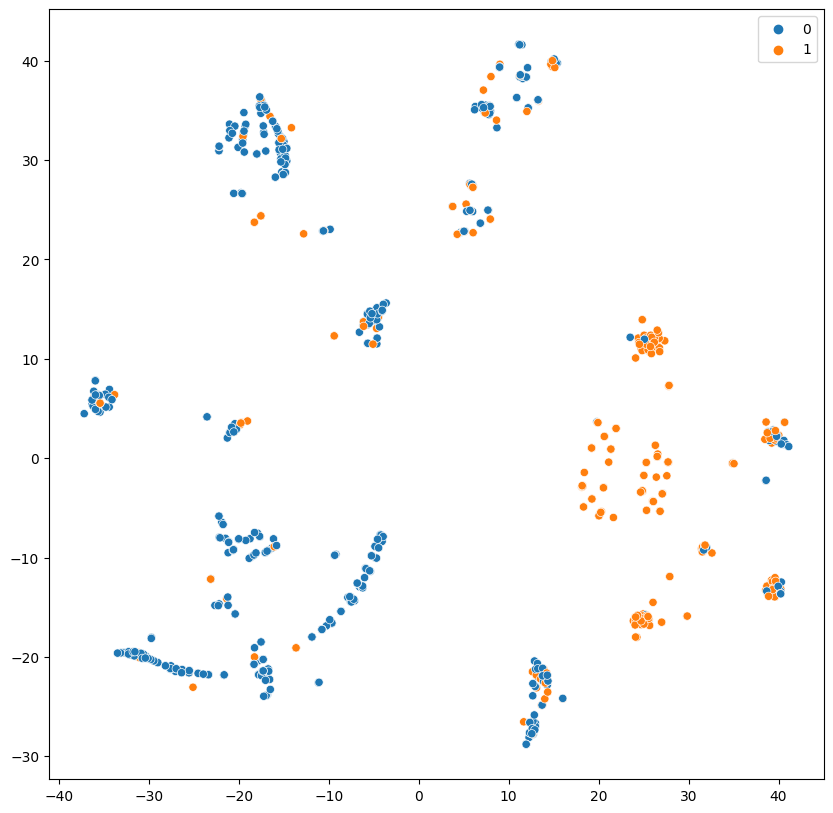

In [ ]:
# np array操作: 對每一個軸各自做
plt.figure(figsize=(10, 10))
x_coords = x_tsne[:,0]
y_coords = x_tsne[:,1]
sns.scatterplot(x=x_coords, y=y_coords, hue=y)

預處理(Missing/One-Hot/萃取) -> (tSNE評估一下這個問題是否困難) -> 建立模型 -> feature_impotance做出故事